In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [2]:
data = pd.read_csv("ind_bretagne_agglo.csv")

In [3]:
data.head(10)

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur
0,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a93,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a92,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a91,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a90,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a8f,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600
5,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a8e,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,242900314,Brest Métropole,0,0,0,0,0,POINT (147878.22420658765 6837175.794037035),#99E600
6,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a8d,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200042174,CA Lorient,0,0,0,0,0,POINT (229772.04043578357 6768639.926683848),#99E600
7,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a8c,2020-12-31T10:00:00,3,Bon,Air Breizh,EPCI,242900314,Brest Métropole,3,0,3,2,0,POINT (147878.22420658765 6837175.794037035),#99E600
8,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a8b,2020-12-31T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,2,0,3,2,0,POINT (338719.75810268405 6844013.788199687),#99E600
9,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a8a,2020-12-31T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,2,0,3,2,0,POINT (172753.63056731108 6795400.543816281),#99E600


### Métadonnées

Service recensant l'ensemble des valeurs d'indice d'Air Breizh à l'échelle des agglomérations sur un an glissant (de J-365 à J+1) + l'année antérieure à l'année en cours. Ce service n'est plus actualisé depuis le 1er janvier 2021.
Description des champs des flux d'indice:
- date_ech : date de l'indice au format aaaa-mm-ddTHH:MM:SSZ
- valeur : Valeur de l'indice, compris entre 1 et 10, ou null si absent.
- qualif : texte qualificatif associé à la valeur de l'indice
- source : texte décrivant la source des données c'est-à-dire "Air Breizh"
- type_zone : texte décrivant le type de zone considérée (ici 'EPCI')
- code_zone : Identifiant unique de l'agglomération concernée par l'indice.
- lib_zone : Nom de l'agglomération concernée par l'indice.
-val_no2 : valeur du sous-indice de dioxyde d'azote, entier de 1 à 10 ou 0 si absent ou null si non calculé.
-val_so2 : valeur du sous-indice de dioxyde de soufre, entier de 1 à 10 ou 0 si absent ou null si non calculé.
-val_o3 : valeur du sous-indice d'ozone, entier de 1 à 10 ou 0 si absent ou null si non calculé.
-val_pm10 : valeur du sous-indice de particules fines de diamètre inférieur à 10µm, entier de 1 à 10 ou 0 si absent ou null si non calculé.
-val_pm25 : valeur du sous-indice de particules fines de diamètre inférieur à 2.5µm, entier de 1 à 10 ou 0 si absent ou null si non calculé.
- couleur : code hexadecimal couleur associé à la valeur de l'indice au format #RRVVBB
- geom : Géolocalisation de l'agglomération en projection Lambert 93 (EPSG : 2154).

In [4]:
data['lib_zone'].value_counts()


CA Quimper Bretagne Occidentale                        366
CA Golfe du Morbihan - Vannes                          365
CA Saint-Brieuc Armor                                  365
CA Lorient                                             365
CA du Pays de Saint-Malo (Saint-Malo Agglomération)    363
Rennes Métropole                                       362
Brest Métropole                                        361
Name: lib_zone, dtype: int64

On vérifie s'il y a des données nulles

In [5]:
data.isnull().sum()

FID          0
date_ech     0
valeur       0
qualif       0
source       0
type_zone    0
code_zone    0
lib_zone     0
val_no2      0
val_so2      0
val_o3       0
val_pm10     0
val_pm25     0
geom         0
couleur      0
dtype: int64

On formate les données du temps pour pouvoir les utiliser

In [6]:
temps = []
for col, row in data['date_ech'].iteritems():
    row = row.split('T')[0]
    temps.append(row)
data.insert(1, "temps", temps, True)
date_time = pd.to_datetime(data['temps'])
data.insert(1, "date_time", date_time, True) 

data

,FID,date_time,temps,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur
0,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a93,2021-01-01,2021-01-01,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a92,2021-01-01,2021-01-01,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a91,2021-01-01,2021-01-01,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a90,2021-01-01,2021-01-01,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,ind_bretagne_agglo.fid--15c6355_17772446a84_-2a8f,2021-01-01,2021-01-01,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,ind_bretagne_agglo.fid--15c6355_17772446a84_-20a3,2020-01-01,2020-01-01,2020-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,2,0,2,3,0,POINT (269153.2682993477 6832824.934141148),#99E600
2543,ind_bretagne_agglo.fid--15c6355_17772446a84_-20a2,2020-01-01,2020-01-01,2020-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,2,0,3,2,0,POINT (172753.63056731108 6795400.543816281),#99E600
2544,ind_bretagne_agglo.fid--15c6355_17772446a84_-20a1,2020-01-01,2020-01-01,2020-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200042174,CA Lorient,2,0,3,2,0,POINT (229772.04043578357 6768639.926683848),#99E600
2545,ind_bretagne_agglo.fid--15c6355_17772446a84_-20a0,2020-01-01,2020-01-01,2020-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,0,2,3,0,POINT (338719.75810268405 6844013.788199687),#99E600


On rentre les colonnes ayant les données qui nous intéresse dans un nouveau dataset

In [17]:
new_data = data[['date_time','temps','valeur','qualif','lib_zone','val_no2','val_o3']]
new_data

,date_time,temps,valeur,qualif,lib_zone,val_no2,val_o3
0,2021-01-01,2021-01-01,3,Bon,CA Saint-Brieuc Armor,0,0
1,2021-01-01,2021-01-01,3,Bon,CA Golfe du Morbihan - Vannes,0,0
2,2021-01-01,2021-01-01,3,Bon,CA Quimper Bretagne Occidentale,0,0
3,2021-01-01,2021-01-01,3,Bon,Rennes Métropole,0,0
4,2021-01-01,2021-01-01,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0
...,...,...,...,...,...,...,...
2542,2020-01-01,2020-01-01,3,Bon,CA Saint-Brieuc Armor,2,2
2543,2020-01-01,2020-01-01,3,Bon,CA Quimper Bretagne Occidentale,2,3
2544,2020-01-01,2020-01-01,3,Bon,CA Lorient,2,3
2545,2020-01-01,2020-01-01,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,2


<AxesSubplot:>

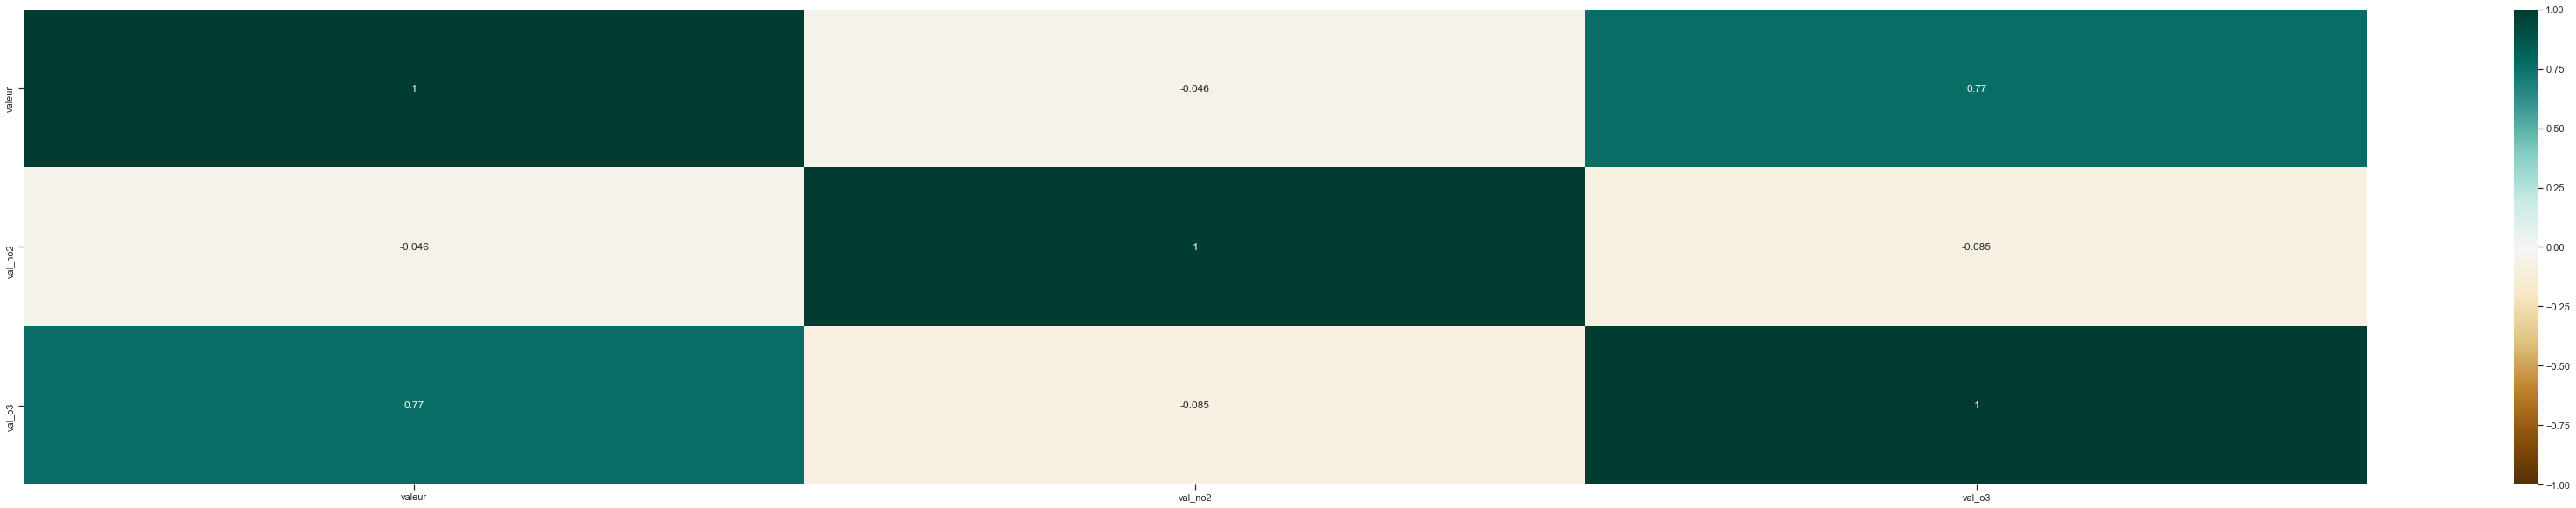

In [72]:
sns.heatmap(new_data.corr(), vmin=-1, vmax=1, cmap='BrBG',annot=True)


On constate une correlation entre la valeur de l'indice,valeur du sous-indice de dioxyde d'azote (val_no2) et valeur du sous-indice d'ozone (val_o3)

In [18]:
groupement = new_data.groupby('date_time')


In [19]:
CA_Saint_Brieuc_Armor = groupement.apply(lambda x: x[x['lib_zone'] == 'CA Saint-Brieuc Armor']['val_no2'].sum())


In [20]:
CA_Quimper_Bretagne_Occidentale  = groupement.apply(lambda x: x[x['lib_zone'] == 'Quimper Bretagne Occidentale']['valeur'].sum())
CA_Lorient   = groupement.apply(lambda x: x[x['lib_zone'] == 'CA Lorient']['valeur'].sum())
CA_Golfe_du_Morbihan_Vannes  = groupement.apply(lambda x: x[x['lib_zone'] == 'CA Golfe du Morbihan - Vannes']['valeur'].sum())
CA_du_pays_de_saint_malo = groupement.apply(lambda x: x[x['lib_zone'] == 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)']['valeur'].sum())
Rennes_Métropole  = groupement.apply(lambda x: x[x['lib_zone'] == 'Rennes Métropole']['valeur'].sum())
Brest_Metropole  = groupement.apply(lambda x: x[x['lib_zone'] == 'Brest Métropole']['val_no2'].sum())


  


On crèe nos différents dataset qui serviront à faire des graphes 

In [74]:
CA_Saint_Brieuc_Armor = new_data.loc[new_data['lib_zone'] == 'CA Saint-Brieuc Armor']
CA_Quimper_Bretagne_Occidentale = new_data.loc[new_data['lib_zone'] == 'Quimper Bretagne Occidentale']
CA_Lorient = new_data.loc[new_data['lib_zone'] == 'CA Lorient']
CA_Golfe_du_Morbihan_Vannes = new_data.loc[new_data['lib_zone'] == 'CA Golfe du Morbihan - Vannes']
CA_du_pays_de_saint_malo = new_data.loc[new_data['lib_zone'] == 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)']
Rennes_Métropole = new_data.loc[new_data['lib_zone'] == 'Rennes Métropole']
Brest = new_data.loc[new_data['lib_zone'] == 'Brest Métropole']


In [23]:
"""
b = pd.to_datetime(Brest['temps'])
a = b.dt.month
a
"""


"\nb = pd.to_datetime(Brest['temps'])\na = b.dt.month\na\n"

#### Evoultion de la quantité d'azote , de l'indice de la valeur, et du sous indice d'ozone en fonciton des mois à Brest Métropole

Text(0.5, 0, 'Date')

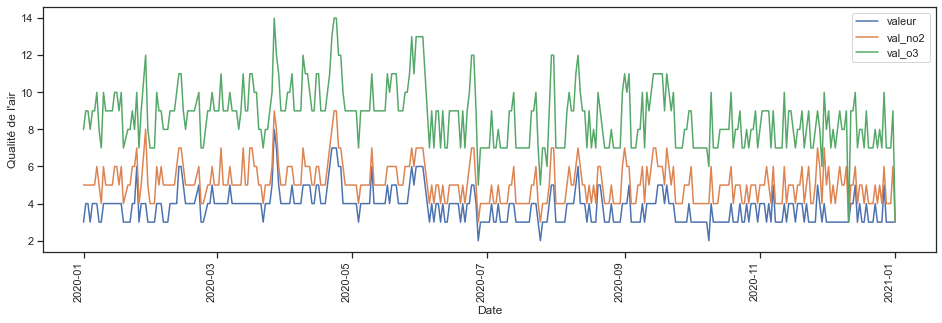

In [73]:
Brest.plot(x='date_time', y=["valeur","val_no2", "val_o3"],
          figsize=(16,5), stacked=True)
plt.ylabel("Qualité de l'air")
plt.xticks(rotation= 90)
plt.xlabel("Date")

#### Evoultion de la quantité d'azote en fonciton des jours à Brest métropole (veuillez double-cliquer pour aggrandir)

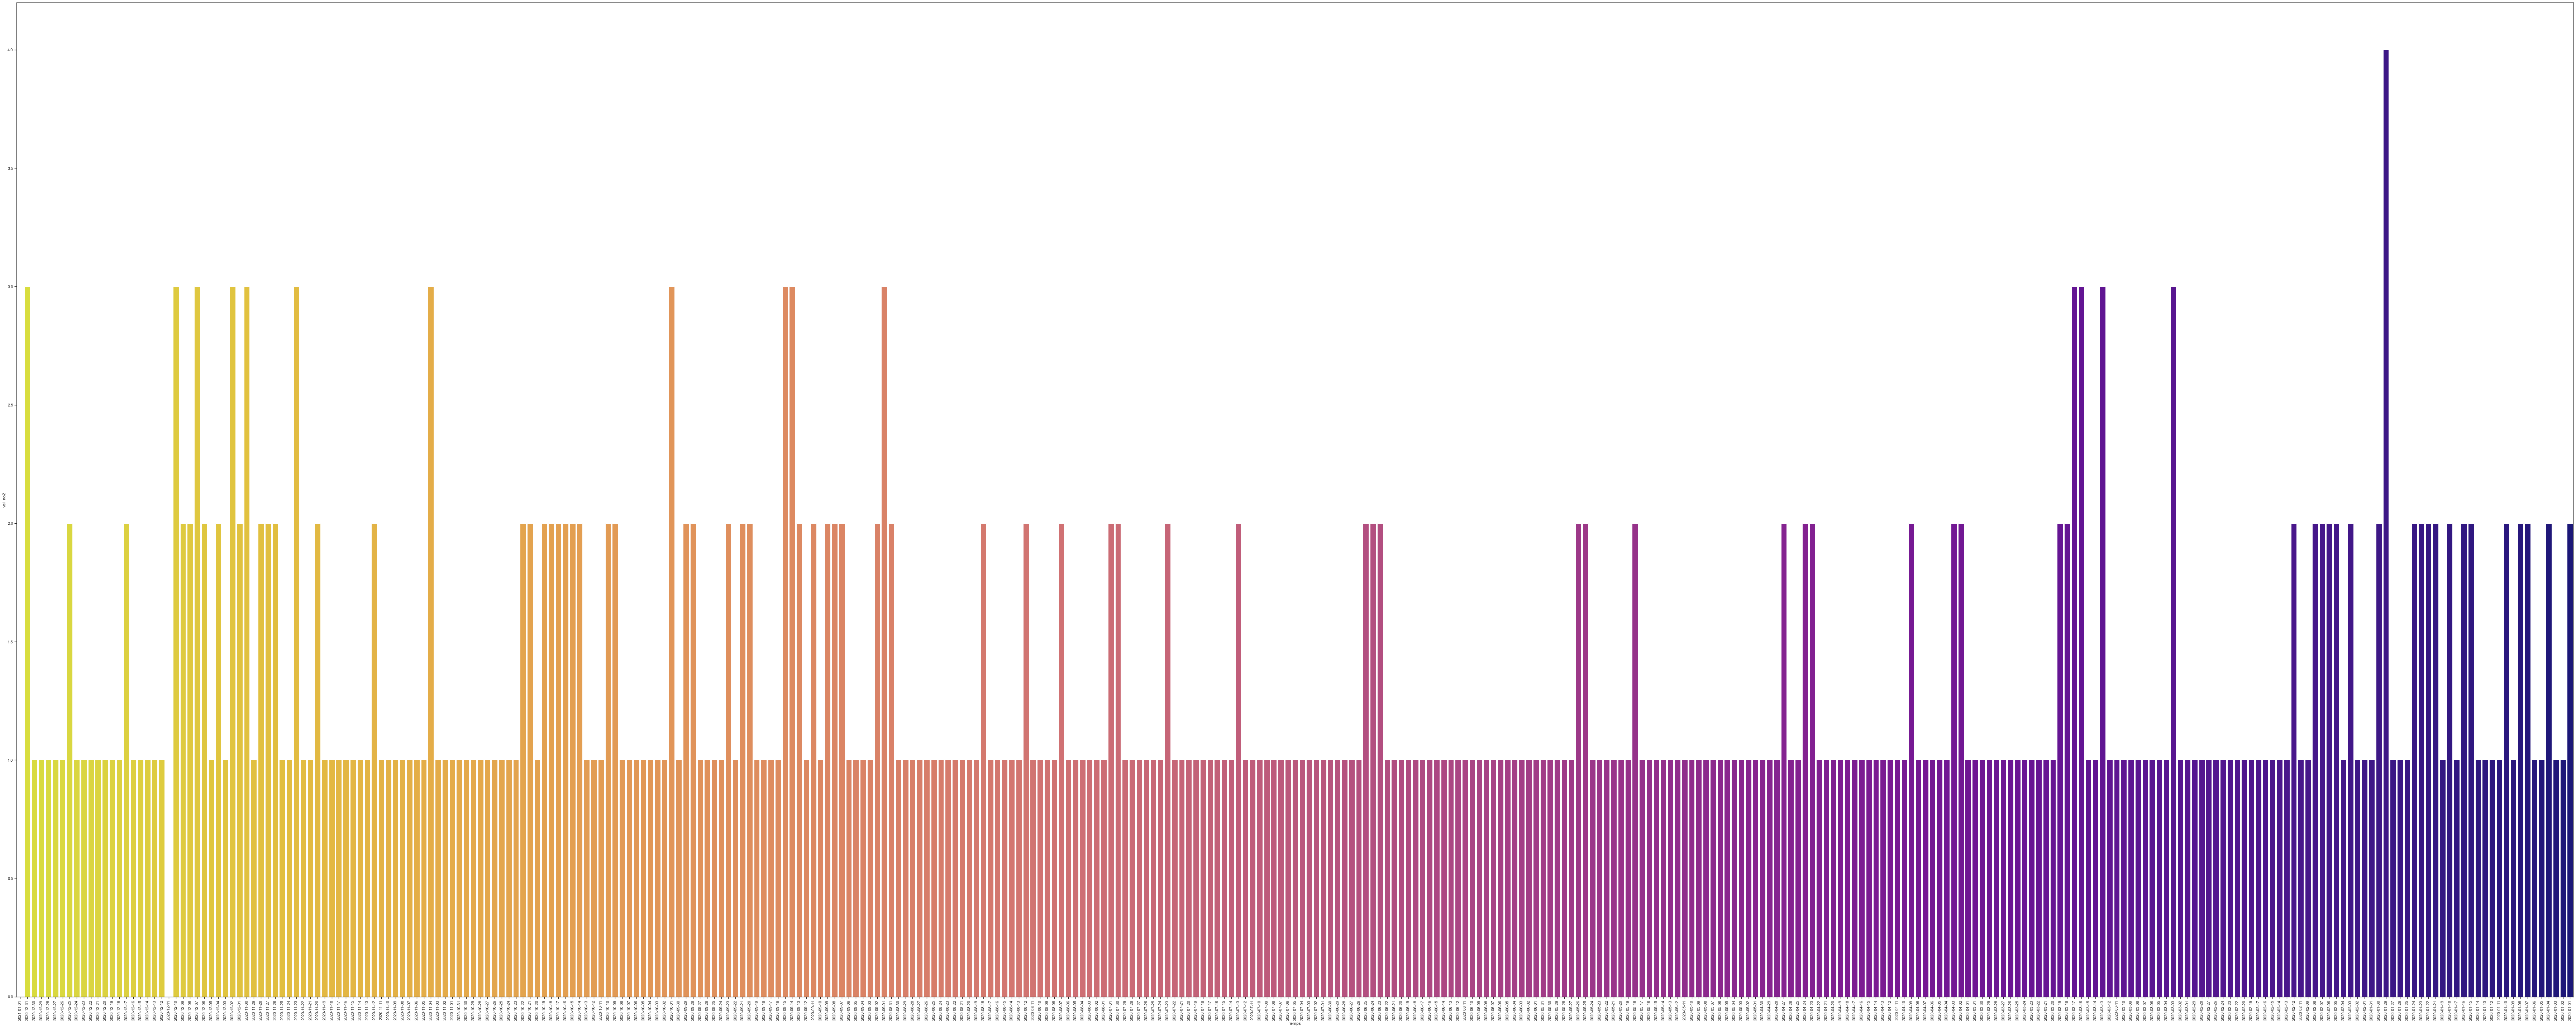

In [75]:
plt.figure(figsize=(100,40))
sns.barplot(x=Brest['temps'], y=Brest['val_no2'], palette="plasma_r")
#plt.xlabel('\nArrondissements', fontsize=15, color='#c0392b')
#plt.ylabel("Nombre d'annonces\n", fontsize=15, color='#c0392b')
#plt.title("Nombre d'annonces par arrondissement à Paris sur seloger.com\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 90)
plt.tight_layout()

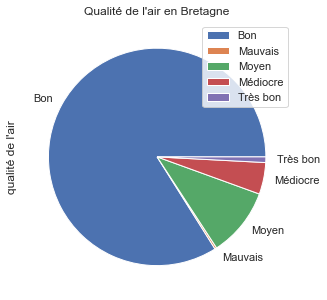

In [84]:
qualite_air_brest = pd.crosstab(Brest.qualif, "qualité de l'air")
qualite_air_brest.plot.pie(subplots=True, figsize = (5,5))
plt.title("Qualité de l'air en Bretagne" )
plt.legend()

#### Evoultion de la quantité d'azote , de l'indice de la valeur, et du sous indice d'ozone en fonciton des mois à Renne Métropole

Text(0.5, 0, 'Date')

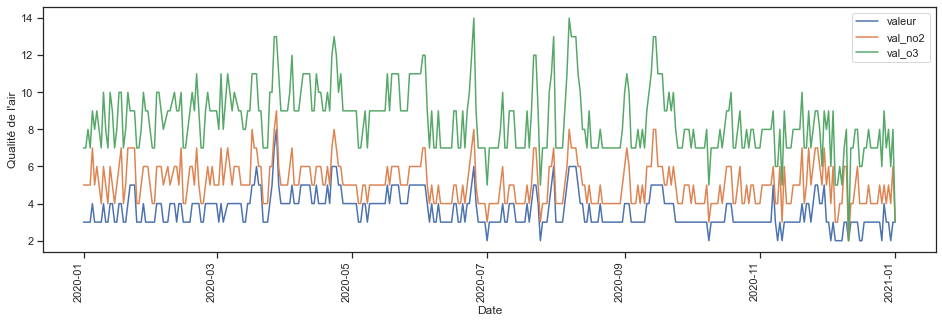

In [76]:
Rennes_Métropole.plot(x='date_time', y=["valeur","val_no2", "val_o3"],
          figsize=(16,5), stacked=True)
plt.ylabel("Qualité de l'air")
plt.xticks(rotation= 90)
plt.xlabel("Date")

#### Evoultion de la quantité d'azote en fonciton des jours à Renne métropole

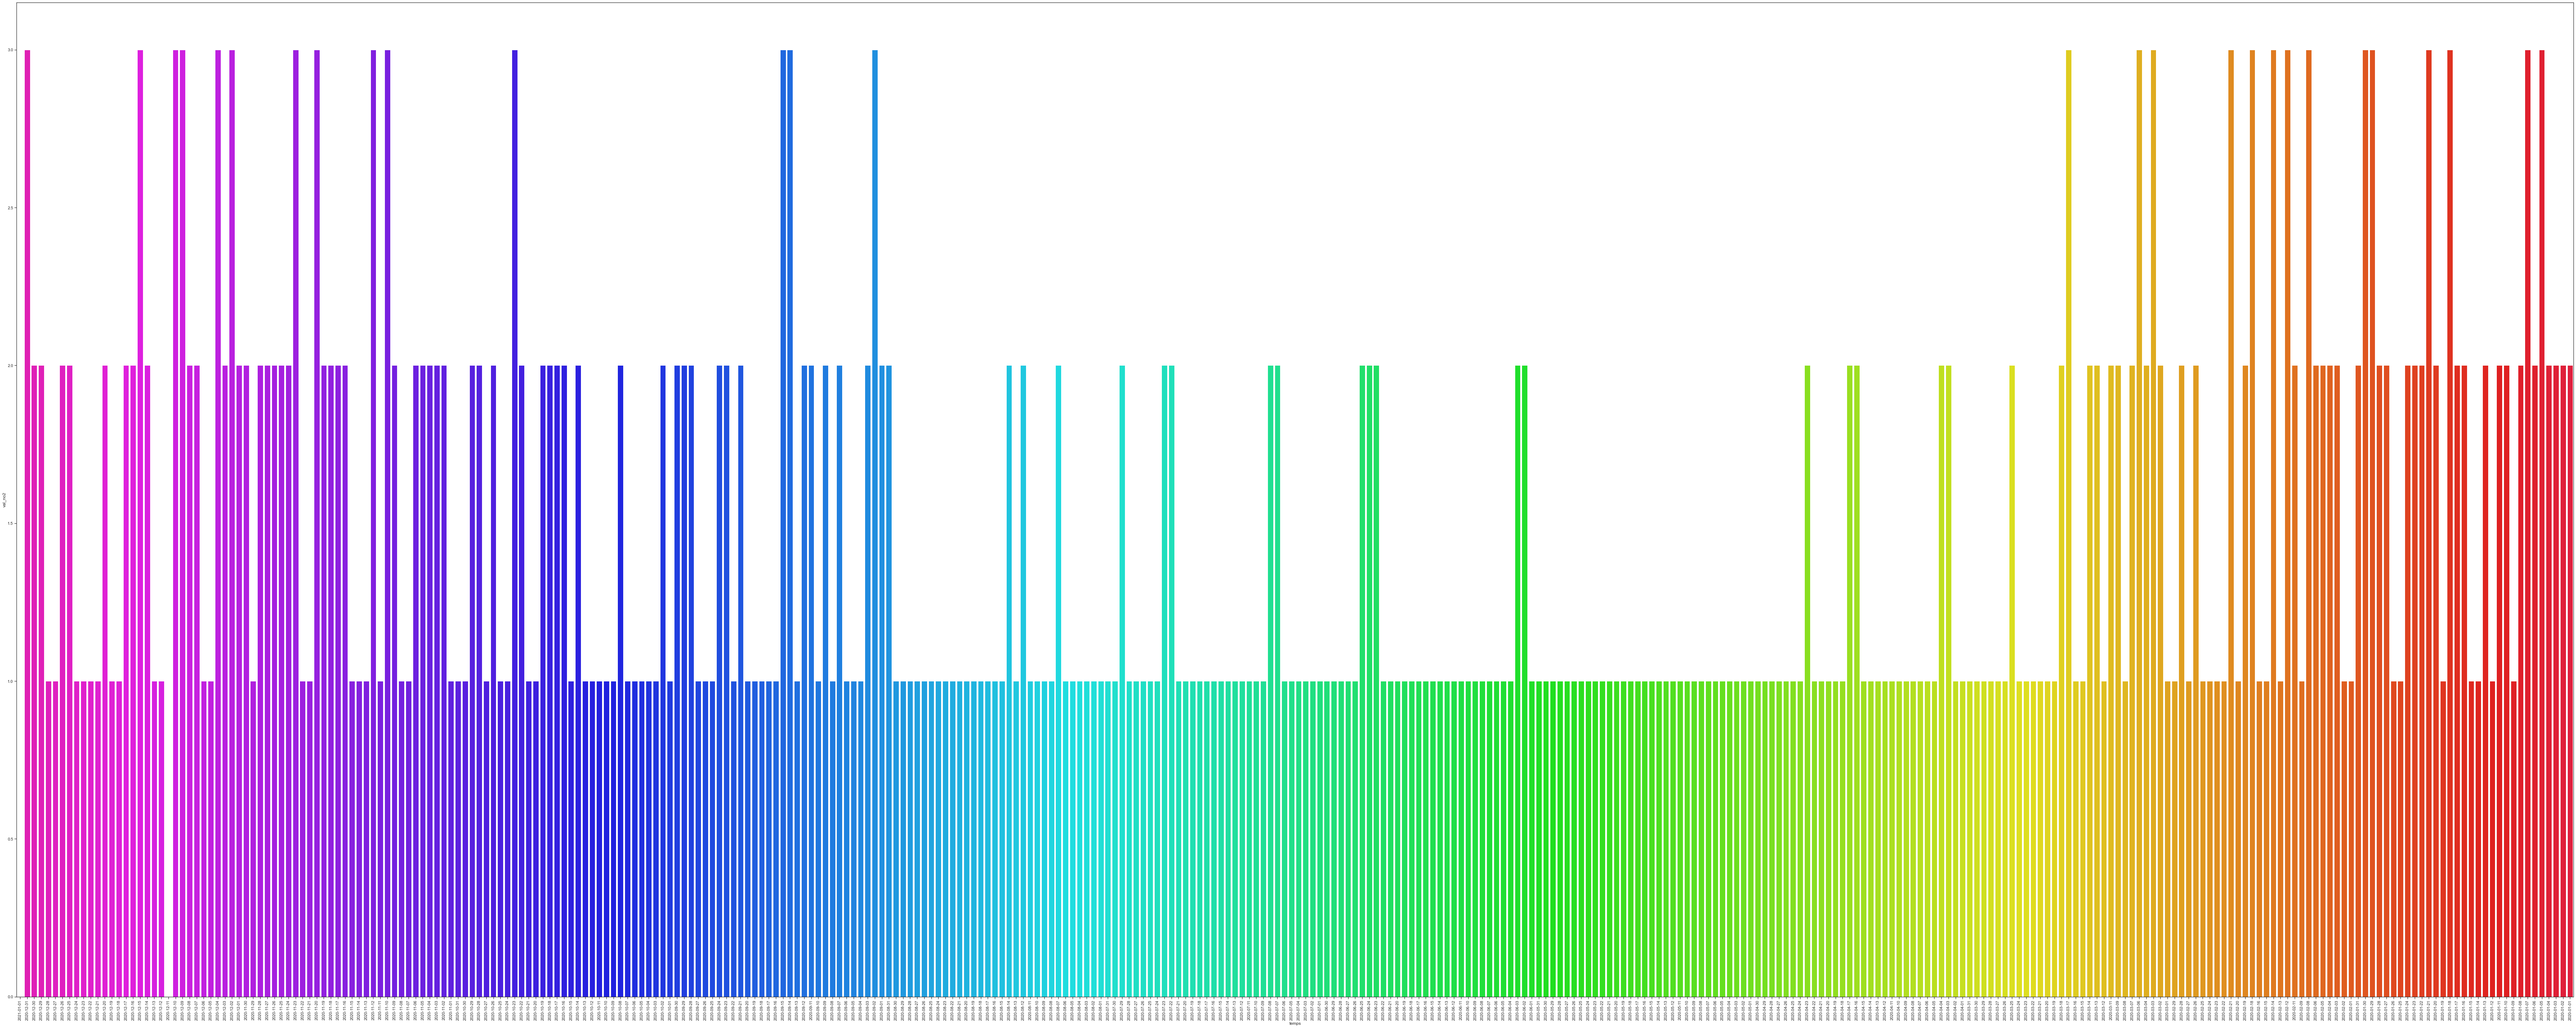

In [80]:
plt.figure(figsize=(100,40))
sns.barplot(x=Rennes_Métropole['temps'], y=Rennes_Métropole['val_no2'], palette="gist_rainbow_r")
#plt.xlabel('\nArrondissements', fontsize=15, color='#c0392b')
#plt.ylabel("Nombre d'annonces\n", fontsize=15, color='#c0392b')
#plt.title("Nombre d'annonces par arrondissement à Paris sur seloger.com\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 90)
plt.tight_layout()

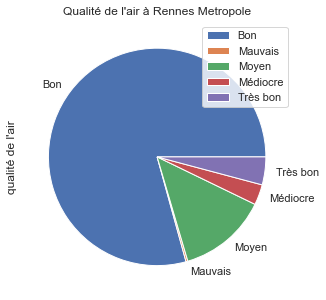

In [85]:
qualite_air_Rennes_Métropole = pd.crosstab(Rennes_Métropole.qualif, "qualité de l'air")
qualite_air_Rennes_Métropole.plot.pie(subplots=True, figsize = (5,5))
plt.title("Qualité de l'air à Rennes Metropole" )
plt.legend()

Ces différents graphes nous montrent que contrairement à ce qu'on aurait pu penser, le confinement n'a pas joué positivement sur la quantité de gaz "nocifs" dans les différentes régions de la Bretagne. Cependant nous pouvons dire que la qualité de l'air dans ces régions est glabalement bonne/raisonnable.